In [1]:
import numpy as np

In [2]:
# beta = 1

def f(x, beta=1):
    return np.exp(-beta * x)

In [12]:
def exact_x(x, a=0):
    return 1/3 * np.exp(-x) * (np.exp(3*x - 3*a)-1)

In [4]:
def k(x, t):
    return np.exp(x-t)

In [31]:
from scipy.integrate import cumtrapz

In [46]:
nx = 100
mt = 100
X = np.linspace(0, 1, nx)
T = np.linspace(0, 1, mt)



def solution(X, T, k, f):
    fn = f(X)
    h = X[1] - X[0]
    k_nm = np.empty((len(X), len(T)))
    for i, xn in enumerate(X):
        for j, tm in enumerate(T):
            k_nm[i, j] = k(xn, tm)
    
    # sol
    x_sol = np.empty_like(X)
    for i in range(len(X)):
        x_sol[i] += (fn[i] + h/2*k_nm[i, 0]*X[0]) / (1 - h/2 * k_nm[i, i])
        for j in range(1, len(T)-1):
            x_sol += k_nm[i, j] * X[j] / (1 - h/2 * k_nm[i, i])
    return x_sol

In [47]:
sol = solution(X, T, k, f)

TypeError: 'numpy.ndarray' object is not callable

In [48]:
exact_x(X)

array([0.        , 0.01015254, 0.02041024, 0.03077626, 0.04125383,
       0.05184623, 0.0625568 , 0.07338894, 0.0843461 , 0.0954318 ,
       0.10664961, 0.11800318, 0.12949622, 0.1411325 , 0.15291586,
       0.16485021, 0.17693953, 0.18918787, 0.20159936, 0.21417821,
       0.22692868, 0.23985514, 0.25296203, 0.26625387, 0.27973525,
       0.29341087, 0.30728551, 0.32136403, 0.33565139, 0.35015264,
       0.36487292, 0.37981748, 0.39499166, 0.41040091, 0.42605077,
       0.44194688, 0.45809503, 0.47450106, 0.49117097, 0.50811086,
       0.52532694, 0.54282554, 0.56061312, 0.57869627, 0.59708169,
       0.61577622, 0.63478684, 0.65412065, 0.6737849 , 0.69378698,
       0.71413442, 0.7348349 , 0.75589625, 0.77732645, 0.79913364,
       0.82132612, 0.84391236, 0.86690098, 0.89030079, 0.91412075,
       0.93837003, 0.96305795, 0.98819402, 1.01378796, 1.03984966,
       1.06638922, 1.09341693, 1.12094328, 1.14897899, 1.17753498,
       1.20662238, 1.23625256, 1.26643711, 1.29718784, 1.32851

In [15]:
sol

array([4490.62871275, 4490.64901749, 4490.66942582, 4490.68993879,
       4490.71055747, 4490.73128293, 4490.75211624, 4490.77305852,
       4490.79411085, 4490.81527437, 4490.8365502 , 4490.85793947,
       4490.87944334, 4490.90106298, 4490.92279956, 4490.94465427,
       4490.9666283 , 4490.98872286, 4491.01093919, 4491.03327852,
       4491.05574209, 4491.07833117, 4491.10104703, 4491.12389096,
       4491.14686426, 4491.16996823, 4491.19320422, 4491.21657356,
       4491.2400776 , 4491.26371771, 4491.28749527, 4491.31141168,
       4491.33546834, 4491.35966669, 4491.38400815, 4491.40849419,
       4491.43312627, 4491.45790586, 4491.48283448, 4491.50791363,
       4491.53314485, 4491.55852966, 4491.58406964, 4491.60976636,
       4491.63562142, 4491.66163641, 4491.68781296, 4491.71415271,
       4491.74065732, 4491.76732847, 4491.79416784, 4491.82117714,
       4491.84835809, 4491.87571245, 4491.90324196, 4491.93094841,
       4491.9588336 , 4491.98689933, 4492.01514745, 4492.04357

In [24]:
# Последовательные решения 

fn = f(X)
k_nm = np.empty((len(X), len(T)))
for i, xn in enumerate(X):
    for j, tm in enumerate(T):
        k_nm[i, j] = k(xn, tm)

def solve_iter(x0, f, k, X, T, n=10):
    x_last = x0
    x_now = [cumtrapz(x_last * k_nm[i, :], X) for i in range(len(x0))]
    for i in range(n):
        x_last = x_now.copy()
        x_now = [cumtrapz(x_last * k_nm[i, :], X) for i in range(len(x0))]
    return x_now

NameError: name 'f' is not defined

In [36]:
x_iter = solve_iter(fn, fn, k_nm, X, T)

ValueError: operands could not be broadcast together with shapes (100,99) (100,) 

In [26]:
fn * k_nm[0, :]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
a = 0
b = 1
h = 1e-3

N = int((b-a)/h)

t = np.array([a + h*i for i in range(N)])

beta = 1

f = np.array([np.exp(beta*t[i]) for i in range(N)])
f_noise = f + 0.3 + np.random.randn(N)

l = -1
K = np.zeros((N,N))
for i in range(N):
    for j in range(i+1):
        K[i, j] = np.exp(l*(t[i]-t[j]))

In [2]:
import matplotlib.pyplot as plt

In [11]:
def solve(k, f, h):
    N = len(f)
    x = np.zeros(N)
    x[0]=f[0]
    for i in range(1, N):
        s=0
        for j in range(1, i):
            s += k[i,j] * x[j]
        x[i]= (f[i] + h/2*k[i,0]+ h*s)/ (1 - h/2*k[i,i])
    return x

In [56]:
x_ex = [2*np.exp(t[i])-1 for i in range(N)]

In [57]:
x_ex

[1.0,
 1.0020010003334168,
 1.0040040026680006,
 1.0060090090067542,
 1.0080160213546838,
 1.010025041718802,
 1.0120360721081298,
 1.0140491145336972,
 1.016064171008547,
 1.0180812435477358,
 1.020100334168336,
 1.022121444889439,
 1.0241445777321556,
 1.0261697347196184,
 1.0281969178769845,
 1.0302261292314379,
 1.0322573708121898,
 1.0342906446504814,
 1.0363259527795874,
 1.0383632972348162,
 1.0404026800535116,
 1.042444103275057,
 1.0444875689408764,
 1.0465330790944352,
 1.048580635781243,
 1.0506302410488577,
 1.052681896946884,
 1.0547356055269788,
 1.05679136884285,
 1.0588491889502616,
 1.0609090679070339,
 1.0629710077730454,
 1.0650350106102366,
 1.0671010784826112,
 1.0691692134562358,
 1.0712394175992466,
 1.0733116929818474,
 1.0753860416763144,
 1.0774624657569953,
 1.0795409673003156,
 1.0816215483847764,
 1.083704211090959,
 1.0857889575015265,
 1.0878757897012252,
 1.0899647097768876,
 1.0920557198174339,
 1.0941488219138744,
 1.0962440181593114,
 1.09834131064894

In [58]:
x_sol = solve(K, f)

In [59]:
x_sol

array([1.        , 1.002001  , 1.004004  , 1.00600901, 1.00801602,
       1.01002504, 1.01203608, 1.01404912, 1.01606418, 1.01808125,
       1.02010034, 1.02212145, 1.02414458, 1.02616974, 1.02819693,
       1.03022614, 1.03225738, 1.03429065, 1.03632596, 1.03836331,
       1.04040269, 1.04244412, 1.04448758, 1.04653309, 1.04858065,
       1.05063026, 1.05268191, 1.05473562, 1.05679139, 1.05884921,
       1.06090909, 1.06297103, 1.06503503, 1.0671011 , 1.06916923,
       1.07123944, 1.07331171, 1.07538606, 1.07746249, 1.07954099,
       1.08162157, 1.08370424, 1.08578898, 1.08787582, 1.08996474,
       1.09205575, 1.09414885, 1.09624405, 1.09834134, 1.10044073,
       1.10254222, 1.10464582, 1.10675152, 1.10885932, 1.11096924,
       1.11308126, 1.1151954 , 1.11731166, 1.11943003, 1.12155052,
       1.12367313, 1.12579787, 1.12792473, 1.13005372, 1.13218484,
       1.13431809, 1.13645347, 1.138591  , 1.14073066, 1.14287246,
       1.14501641, 1.14716249, 1.14931073, 1.15146112, 1.15361

In [4]:
def error(numer, exact):
    return np.linalg.norm(exact-numer)/np.linalg.norm(exact)

In [20]:
def solution(h):
    a, b = 0, 1
    N = int((b-a)/h)

    t = np.array([a + h*i for i in range(N)])

    beta = 1

    f = np.array([np.exp(beta*t[i]) for i in range(N)])

    l = -1
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1):
            K[i, j] = np.exp(l*(t[i]-t[j]))
    return solve(K, f, h), [2*np.exp(t[i])-1 for i in range(N)]
            

In [21]:
nh = 50

H = np.logspace(-3, -1, nh)

er = [error(*solution(h)) for h in H]

Text(0, 0.5, 'error')

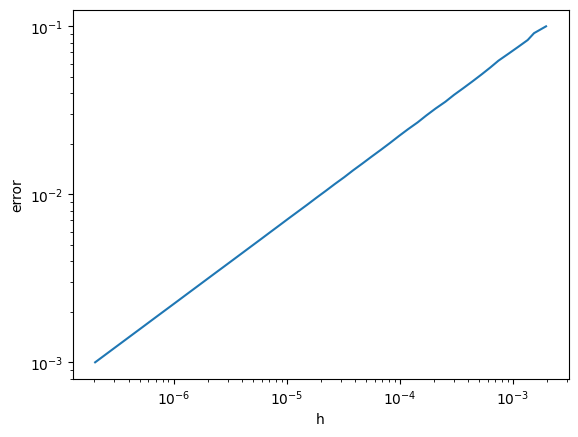

In [22]:
plt.loglog(er, H)
plt.xlabel("h")
plt.ylabel("error")

In [23]:
def solution_noise(h):
    f = np.array([np.exp(beta*t[i]) + np.random.random()/10 for i in range(N)])
    a, b = 0, 1
    N = int((b-a)/h)

    t = np.array([a + h*i for i in range(N)])

    beta = 1

    l = -1
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1):
            K[i, j] = np.exp(l*(t[i]-t[j]))
    return solve(K, f, h), [2*np.exp(t[i])-1 for i in range(N)]

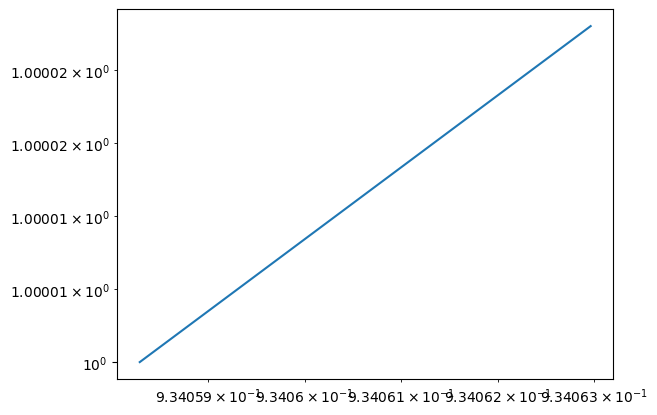

In [68]:
plt.loglog(er, H)